## Lesson 22 - Walk with Graph Algorithms





### Table of Contents
- [Import two dataset into Neo4j](#import_dataset)
- [Connect to Neo4j with Py2neo](#connect)
- [Cypher Query Keyword](#cypher_query_keyword)
- [Query Hashtag and Instagram Post with igraph](#query_hashtag)
- [Plot tuple lists as 3D graphs with jgraph](#jgraph)
- [Graph Algorithms](#graph_algorithms)
- [Correlated Facebook Fan Page with keyword](#correlated__fanPage_with_keyword)
- [Which Facebook fan page have the highest betweenness?](#highest_betweenness)
- [Community detection](#community_detection)
- [Visualize the Model](#visualize_model)








<a id="import_dataset"></a>
## Import two dataset into Neo4j

#### Dataset B:

- keyword: 王牌辯護人
- date: 2020-10-19 ~ 2021-02-17
- sources: Facebook, Instagram

#### Dataset B:

- keyword: 胡宇威
- date: 2020-10-19 ~ 2021-02-17
- sources: Facebook, Instagram

(1) Create Neo4j database.

(2) Copy ./csv/AB/*.csv into import folder.

<img src="images/walk_with_dataframe_from_AB.png">

### run import command
```
.\bin\neo4j-admin import --nodes=import/post_keyword_nodes.csv --nodes=import/post_hashtags_nodes.csv --nodes=import/post_mention_nodes.csv --nodes=import/all_fb_expanded_nodes.csv --nodes=import/all_fb_group_nodes.csv --nodes=import/all_fb_page_nodes.csv --nodes=import/all_fb_post_nodes.csv --nodes=import/all_fb_profile_nodes.csv --nodes=import/all_ig_post_nodes.csv --nodes=import/all_ig_user_nodes.csv --relationships=import/A_fb_expands_rel.csv --relationships=import/A_fb_group_post_rel.csv --relationships=import/A_fb_hashtag_post_rel.csv --relationships=import/A_fb_page_post_rel.csv --relationships=import/A_fb_post_keyword_rel.csv --relationships=import/A_fb_profile_post_rel.csv --relationships=import/A_ig_hashtag_post_rel.csv --relationships=import/A_ig_post_keyword_rel.csv --relationships=import/A_fb_mention_post_rel.csv --relationships=import/A_ig_post_mention_rel.csv --relationships=import/A_ig_user_post_rel.csv --relationships=import/B_fb_expands_rel.csv --relationships=import/B_fb_group_post_rel.csv --relationships=import/B_fb_hashtag_post_rel.csv --relationships=import/B_fb_page_post_rel.csv --relationships=import/B_fb_post_keyword_rel.csv --relationships=import/B_fb_profile_post_rel.csv --relationships=import/B_ig_hashtag_post_rel.csv --relationships=import/B_ig_post_keyword_rel.csv --relationships=import/B_ig_post_mention_rel.csv --relationships=import/B_ig_user_post_rel.csv
```

### Restart database when import is done.

<img src="images/neo4j_import_AB_csv_done.png">

<a id="connect"></a>
## Connect to Neo4j with Py2neo

### enable localhost access, or your public ip, domain name etc.
<img src="images/neo4j_enable_localhost.png">

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib.font_manager import FontProperties
from py2neo import Graph, Node, Relationship

# Windows
myfont = FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)

# Mac OS
#myfont = FontProperties(fname="/Users/mac/Library/Fonts/NotoSansHant-Medium.otf", size=14)

sns.set(font=myfont.get_name())

%matplotlib inline

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
graph = Graph('http://127.0.0.1:7474', username='neo4j', password='42840667')

In [3]:
cypher = '''MATCH (n:A_FacebookPost) RETURN n LIMIT 25'''
df = graph.run(cypher).to_data_frame()
df.sample()

,n
19,{'postUrl': 'https://www.facebook.com/manitalk...


In [4]:
tmp_list = []
for index, row in df.iterrows():
    tmp_list.append(dict(row['n']))
df_ = pd.DataFrame(tmp_list)
df_.fillna('', inplace=True)
# df_["time"] = df_["created"].apply(lambda x: datetime.datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S")+datetime.timedelta(hours=+8))
df_["time"] = df_["created"].apply(lambda x: datetime.datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S"))
df_['likeCount'] = df_['likeCount'].astype(int)
print(df_.shape[0])
df_.sample()

25


,postUrl,loveCount,wowCount,created,thankfulCount,likeCount,postId,hahaCount,commentCount,shareCount,...,fanpageId,pageIdUrl,sadCount,angryCount,FacebookPost,pageUrl,text,fanpageName,hashtags,time
12,https://www.facebook.com/GeorgeHu.IFC/posts/27...,4,1,2021-02-16 03:18:41,0,364,A_100044510706318_271984860961869,0,11,0,...,819516,https://www.facebook.com/512809565403704,0,0,A_100044510706318_271984860961869,https://www.facebook.com/GeorgeHu.IFC,【2021/02/16 IG-限時】寶麗來國際娛樂股份有限公司 🧧🧧🧧🧧🧧🧧🧧🧧🧧🧧 開工大...,胡宇威Geo唯宇獨尊後援會,#王牌辯護人📌週六8pm東森戲劇台40台/#讚聲演唱會📌7/23/#讚聲演唱會📌售票網址：h...,2021-02-16 03:18:41


In [5]:
df_["year"] = df_["time"].apply(lambda x: x.year)
df_["month"] = df_["time"].apply(lambda x: x.month)
df_["day"] = df_["time"].apply(lambda x: x.day)
df_["hour"] = df_["time"].apply(lambda x: x.hour)
df_["minute"] = df_["time"].apply(lambda x: x.minute)
df_["second"] = df_["time"].apply(lambda x: x.second)
df_["weekday"] = df_["time"].apply(lambda x: x.isoweekday())
df_.sample()

,postUrl,loveCount,wowCount,created,thankfulCount,likeCount,postId,hahaCount,commentCount,shareCount,...,fanpageName,hashtags,time,year,month,day,hour,minute,second,weekday
13,https://www.facebook.com/taiwan.drama.quotes/p...,0,0,2021-02-16 02:31:00,0,6,A_221226204738761_1526061324255236,0,0,0,...,台灣戲劇語錄 Taiwan Drama Quotes,#王牌辯護人,2021-02-16 02:31:00,2021,2,16,2,31,0,2


In [6]:
def get_pre_pic(shortv_df, time_col_name, ck_col_name):
    x = []
    if "hour" in time_col_name:
        x = range(1, 24+1)
    elif "minute" in time_col_name:
        x = range(1, 60+1)
    elif "second" in time_col_name:
        x = range(1, 60+1)
    elif "weekday" in time_col_name:
        x = range(1, 7+1)
    elif "day" in time_col_name:
        x = range(1, 31+1)
    elif "month" in time_col_name:
        x = range(1, 12+1)
    else:
        return "please check your time column name."
    
    df_dic = {}
    if (ck_col_name == "likeCount"):
        for k in np.array(shortv_df[[time_col_name, ck_col_name]]):
            if k[0] not in df_dic:
                df_dic[k[0]] = int(k[1])
            else:
                df_dic[k[0]] += int(k[1])
    else:
        return "please check your df column name."

    pic_array = []
    for k in x:
        if k in df_dic:
            pic_array.append([k, df_dic[k]])
        else:
            pic_array.append([k, 0])
    return np.array(pic_array)

In [7]:
dfarray = get_pre_pic(df_, "hour", "likeCount")

<BarContainer object of 24 artists>

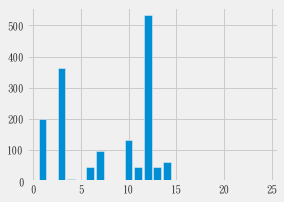

In [8]:
## visulaize likes count with hour
plt.figure(figsize = (4,3))
plt.bar(dfarray[:,0], dfarray[:,1])

<a id="cypher_query_keyword"></a>
## Cypher Query Keyword

In [9]:
keyword = "律師"
cypher = '''MATCH (n:Keywords{keyword:'%s'})-[r]-(m) RETURN * LIMIT 25''' % keyword
df = graph.run(cypher).to_data_frame()
print(df.shape[0])

25


In [10]:
tmp_list = []
for index, row in df.iterrows():
    tmp_list.append(dict(row['m']))
df_ = pd.DataFrame(tmp_list)
df_.fillna('', inplace=True)
# df_["time"] = df_["created"].apply(lambda x: datetime.datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S")+datetime.timedelta(hours=+8))
df_["time"] = df_["created"].apply(lambda x: datetime.datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S"))
df_['likeCount'] = df_['likeCount'].astype(int)
print(df_.shape[0])
df_.sample()

25


,postUrl,loveCount,wowCount,created,thankfulCount,likeCount,postId,hahaCount,commentCount,shareCount,...,fanpageId,pageIdUrl,sadCount,angryCount,FacebookPost,pageUrl,text,fanpageName,hashtags,time
14,https://www.facebook.com/GeorgeHu.IFC/posts/50...,0,0,2020-10-26 07:33:22,0,20,A_512809565403704_5028340283850587,0,5,0,...,819516,https://www.facebook.com/512809565403704,0,0,A_512809565403704_5028340283850587,https://www.facebook.com/GeorgeHu.IFC,【2020/10/26 FB】 王牌辯護人 WACKO AT LAW 『法律應該是保護好人，...,胡宇威Geo唯宇獨尊後援會,#全明星運動會/#hairsisley/#王牌辯護人/#SAWAA代言人/#請問今晚住誰家/...,2020-10-26 07:33:22


In [11]:
print(df_['fanpageId'].unique().shape[0])
df_['fanpageId'].unique()

7


array(['8678939', '819516', '425784', '229561', '126938', '385006',
       '2563935'], dtype=object)

<a id="query_hashtag"></a>
## Query Hashtag and Instagram Post with igraph

Cypher query results can be imported into igraph with py2neo. You'll need to install igraph with pip install python-igraph. Query results should be returned as edgelists, as igraph has a method for building an igraph object from a list of tuples representing edges between nodes.

In [12]:
# pip install python-igraph
import igraph
from igraph import Graph as IGraph
print(igraph.__version__)

0.8.2


In [13]:
keyword = "律師"
cypher = '''MATCH (n:Keywords{keyword:'%s'})-[r]-(m) RETURN * LIMIT 25''' % keyword

data = graph.run(cypher)
node = IGraph.TupleList(data, weights=True)
print(node)

IGRAPH UNW- 26 25 --
+ attr: name (v), weight (e)
+ edges (vertex names):
(_15777:B_FacebookPost {FacebookPost: 'B_109516167115853_420740192660114',
angryCount: '0', careCount: '0', commentCount: '1', created: '2020-10-19
04:00:18', fanpageId: '8678939', fanpageName: '\u6771\u68ee\u5275\u4f5c',
hahaCount: '0', likeCount: '35', loveCount: '0', pageIdUrl:
'https://www.facebook.com/109516167115853', pageUrl:
'https://www.facebook.com/EBCoriginal2015', postId:
'B_109516167115853_420740192660114', postUrl:
'https://www.facebook.com/EBCoriginal2015/posts/420740192660114', sadCount:
'0', shareCount: '0', text: '\u300a\u738b\u724c\u8faf\u8b77\u4eba\u300bTeaser\
u5c31\u662f\u4eca\u5929\uff01 \uff03\u6771\u68ee\u5275\u4f5c
\uff03\u738b\u724c\u8faf\u8b77\u4eba \uff03\u80e1\u5b87\u5a01', thankfulCount:
'0', wowCount: '0'})--(_8:Keywords {Keyword: 'K100000009', keyword:
'\u5f8b\u5e2b'}), (_8:Keywords {Keyword: 'K100000009', keyword:
'\u5f8b\u5e2b'})--(_15775:B_FacebookPost {FacebookPost:
'B_5128095

In [14]:
from igraph import Graph as IGraph

cypher = '''MATCH (m:A_FacebookPost)-[r:RELATED_TO]-(k) RETURN m.fanpageName as source, k.keyword AS target LIMIT 25'''

data = graph.run(cypher)
tups = []

for d in data:
    tups.append((d["source"], d["target"]))

In [15]:
ig = IGraph.TupleList(tups)
ig

In [16]:
best = ig.vs.select(_degree = ig.maxdegree())["name"]
best

['我是運動+']

<a id="jgraph"></a>
## Plot tuple lists as 3D graphs with jgraph

jgraph will plot tuple lists as 3D graphs.

In [17]:
# pip install jgraph
import jgraph

jgraph.draw([(1, 2), (2, 3), (3, 4), (4, 1), (4, 5), (5, 2)])

In [18]:
data = graph.run("MATCH (n)-->(m) RETURN ID(n), ID(m) LIMIT 25")
data = [tuple(x) for x in data]

jgraph.draw(data)

In [19]:
import jgraph

cypher = """
MATCH (page1:A_FacebookFanPage)-[r1:POSTS]->(m:A_FacebookPost)-[:RELATED_TO|TAGS]-(k)-[r3:RELATED_TO|TAGS]-(o:A_FacebookPost)<-[r4:POSTS]-(page2:A_FacebookFanPage)
RETURN ID(page1), ID(page2) LIMIT 25
"""

data = graph.run(cypher)

In [20]:
tup = [tuple(x) for x in data]

jgraph.draw(tup)

<a id="graph_algorithms"></a>
## Graph Algorithms

The typical workflow consists of retrieving a subgraph from Neo4j via Cypher and analyzing this graph in igraph.

In [21]:
cypher = '''MATCH (n:A_FacebookPost)-[:RELATED_TO]-(m)-[:RELATED_TO]-(o:B_FacebookPost) RETURN * LIMIT 25'''

df = graph.run(cypher).to_data_frame()
df.head()

,m,n,o
0,"{'Keyword': 'K100000007', 'keyword': '受傷'}",{'postUrl': 'https://www.facebook.com/GeorgeHu...,{'postUrl': 'https://www.facebook.com/EBCbuzz/...
1,"{'Keyword': 'K100000007', 'keyword': '受傷'}",{'postUrl': 'https://www.facebook.com/GeorgeHu...,{'postUrl': 'https://www.facebook.com/EBCbuzz/...
2,"{'Keyword': 'K100000007', 'keyword': '受傷'}",{'postUrl': 'https://www.facebook.com/GeorgeHu...,{'postUrl': 'https://www.facebook.com/EBCbuzz/...
3,"{'Keyword': 'K100000007', 'keyword': '受傷'}",{'postUrl': 'https://www.facebook.com/GeorgeHu...,{'postUrl': 'https://www.facebook.com/EBCbuzz/...
4,"{'Keyword': 'K100000007', 'keyword': '受傷'}",{'postUrl': 'https://www.facebook.com/GeorgeHu...,{'postUrl': 'https://www.facebook.com/EBCbuzz/...


In [22]:
from igraph import Graph as IGraph

data = graph.run(cypher)
ig = IGraph.TupleList(data, weights=True)
print(ig)

IGRAPH UNW- 26 25 --
+ attr: name (v), weight (e)
+ edges (vertex names):
(_6:Keywords {Keyword: 'K100000007', keyword:
'\u53d7\u50b7'})--(_13590:A_FacebookPost {FacebookPost:
'A_512809565403704_5010660508951898', angryCount: '0', careCount: '0',
commentCount: '0', created: '2020-10-22 07:52:34', fanpageId: '819516',
fanpageName:
'\u80e1\u5b87\u5a01Geo\u552f\u5b87\u7368\u5c0a\u5f8c\u63f4\u6703', hahaCount:
'0', hashtags: '#\u5168\u660e\u661f\u904b\u52d5\u6703/#\u5168\u660e\u661f\u904
b\u52d5\u6703/#\u90a3\u523b\u7684\u6026\u7136\u5fc3\u52d5/#\u738b\u724c\u8faf\
u8b77\u4eba/#\u795e\u9b54\u4e09\u570b\u5fd7/#SAWAA\u4ee3\u8a00\u4eba/#\u8acb\u
554f\u4eca\u665a\u4f4f\u8ab0\u5bb6/#\u80e1\u5b87\u5a01/#\u80e1\u5b87\u5a01\u76
84\u5a01\u98a8\u5e74/#george_hu/#\u5f4e\u9053boy/#teamblue/#hairsisley',
likeCount: '62', loveCount: '2', pageIdUrl:
'https://www.facebook.com/512809565403704', pageUrl:
'https://www.facebook.com/GeorgeHu.IFC', postId:
'A_512809565403704_5010660508951898', postUrl:
'https:/

<a id="correlated__fanPage_with_keyword"></a>
## Correlated Facebook Fan Page with keyword(:RELATED_TO) and hashtags(:TAGS)

In [23]:
cypher = """
MATCH (page1:A_FacebookFanPage)-[r1:POSTS]->(m:A_FacebookPost)-[:RELATED_TO|TAGS]-(k)-[r3:RELATED_TO|TAGS]-(o:A_FacebookPost)<-[r4:POSTS]-(page2:A_FacebookFanPage)
RETURN page1.fanpageName, page2.fanpageName, count(*) AS weight LIMIT 100
"""

df = graph.run(cypher).to_data_frame()
print(df.shape[0])
df.sample(5)

100


,page1.fanpageName,page2.fanpageName,weight
83,"播吧""""","噪咖""""",95
64,"ET Play新聞""""","噪咖""""",96
59,"大紀元時報 - 台灣(The Epoch Times - Taiwan)""""","噪咖""""",97
5,"東森戲劇""""","噪咖""""",930
84,"吳宇舒""""","噪咖""""",88


In [24]:
df = df.sort_values('weight', ascending=False)
df.head()

,page1.fanpageName,page2.fanpageName,weight
3,"胡宇威Geo唯宇獨尊後援會""""","噪咖""""",106139
4,"東森創作""""","噪咖""""",42245
2,"東森娛樂""""","噪咖""""",29478
0,"噪咖""""","噪咖""""",22984
1,"東森新聞""""","噪咖""""",18445


<a id="highest_betweenness"></a>
## Which Facebook fan page have the highest betweenness?

betweenness(v)=∑s,t∈Vσst(v)σst 

The betweenness centrality of a node v is the number of shortest paths that pass through v, σst(v), divided by the total number of shortest paths, σst.

In [25]:
data = graph.run(cypher)
ig = IGraph.TupleList(data, weights=True)
ig

In [26]:
between = [(node["name"], node.betweenness()) for node in ig.vs]
top = sorted(between, key=lambda x: x[1], reverse=True)
top[:5]

[('噪咖""', 4851.0),
 ('東森新聞""', 0.0),
 ('東森娛樂""', 0.0),
 ('胡宇威Geo唯宇獨尊後援會""', 0.0),
 ('東森創作""', 0.0)]

### Which Facebook fan page have the highest closeness?

closeness(v)=1∑xd(v,x) 

The closeness centrality is the reciprocal of a node's farness, or sum of its shortest path distances from all other nodes in the graph.

In [27]:
close = [(node["name"], node.closeness()) for node in ig.vs]
top = sorted(close, key=lambda x: x[1], reverse=True)
top[:5]

[('噪咖""', 1.0),
 ('東森新聞""', 0.5025380710659898),
 ('東森娛樂""', 0.5025380710659898),
 ('胡宇威Geo唯宇獨尊後援會""', 0.5025380710659898),
 ('東森創作""', 0.5025380710659898)]

<a id="community_detection"></a>
## Community detection

In [29]:
clusters = IGraph.community_walktrap(ig, weights="weight")
clusters = clusters.as_clustering()
len(clusters)

1

In [30]:
nodes = [{"id": node.index, "label": node["name"]} for node in ig.vs]

for node in nodes:
    node["group"] = clusters.membership[node["id"]]
    
nodes[:10]

[{'id': 0, 'label': '噪咖""', 'group': 0},
 {'id': 1, 'label': '東森新聞""', 'group': 0},
 {'id': 2, 'label': '東森娛樂""', 'group': 0},
 {'id': 3, 'label': '胡宇威Geo唯宇獨尊後援會""', 'group': 0},
 {'id': 4, 'label': '東森創作""', 'group': 0},
 {'id': 5, 'label': '東森戲劇""', 'group': 0},
 {'id': 6, 'label': '曾昱嘉""', 'group': 0},
 {'id': 7, 'label': '寶麗來國際娛樂股份有限公司""', 'group': 0},
 {'id': 8, 'label': 'KKTV""', 'group': 0},
 {'id': 9, 'label': '廖峻/ 錦德""', 'group': 0}]

In [31]:
edges = [{"from": x[0], "to": x[1]} for x in ig.get_edgelist()]
edges[:5]

[{'from': 0, 'to': 0},
 {'from': 0, 'to': 1},
 {'from': 0, 'to': 2},
 {'from': 0, 'to': 3},
 {'from': 0, 'to': 4}]

In [33]:
import neo4jupyter
from IPython.core.display import display, HTML
neo4jupyter.init_notebook_mode()

neo4jupyter.vis_network(nodes, edges, physics=True)

<IPython.core.display.Javascript object>

In [36]:
entities = ["律師","麥大奇","婉婷"]
sql = ["MATCH (m)-[:RELATED_TO]-(n) where m.keyword = '{0}' return m.keyword".format(i) for i in entities]
sql

["MATCH (m)-[:RELATED_TO]-(n) where m.keyword = '律師' return m.keyword",
 "MATCH (m)-[:RELATED_TO]-(n) where m.keyword = '麥大奇' return m.keyword",
 "MATCH (m)-[:RELATED_TO]-(n) where m.keyword = '婉婷' return m.keyword"]

<a id="visualize_model"></a>
## Visualize the Model

In [37]:
import neo4jupyter
from IPython.core.display import display, HTML
neo4jupyter.init_notebook_mode()

options = {"InstagramUser": "InstagramUser", "Hashtag": "name"}
neo4jupyter.draw(graph, options, physics=True, limit=30)

<IPython.core.display.Javascript object>

## Cypher Query

- 基礎查詢
```
OPTIONAL MATCH (n1:A_FacebookPost)
WITH n1 LIMIT 100
OPTIONAL MATCH (n2:A_FacebookPost)-[r2:POSTS]-(m2)
RETURN n1,n2,r2,m2 LIMIT 100
```
```
OPTIONAL MATCH (n1:A_FacebookPost)
WITH n1, size((:A_FacebookPost)-[:POSTS]->()) as postount LIMIT 5
OPTIONAL MATCH (n2:A_FacebookPost)-[r2:POSTS]-(m2)
RETURN n1,n2,r2,m2 LIMIT 25
```
```
OPTIONAL MATCH (n1:B_FacebookPost)
WITH n1, size((:A_FacebookPost)-[:POSTS]->()) as postount
OPTIONAL MATCH (n2:A_FacebookPost)-[r2:POSTS]-(m2)
WITH n1,n2,r2,m2
OPTIONAL MATCH (n3:A_FacebookPost)-[r3:POSTS]-(m3)
RETURN n1,n2,r2,m2,n3,r3,m3 LIMIT 25
```
```
OPTIONAL MATCH (n1:B_FacebookPost)
WITH n1, size((:A_FacebookPost)-[:POSTS]->()) as postount
OPTIONAL MATCH (n2:A_FacebookPost)-[r2:POSTS]-(m2)
WITH n1,n2,r2,m2
OPTIONAL MATCH (n3:A_FacebookPost)-[r3:POSTS]-(m3:A_FacebookFanPage)-[r4:POSTS]-(m5:A_FacebookPost)-[r6:RELATED_TO]-(k)-[*0..2]-(s:B_FacebookFanPage)
RETURN n1,n2,r2,m2,n3,r3,m3,r4,m5,r6,k,s LIMIT 100
```


- 初始未選擇節點分類的查詢：
```
MATCH (n1:A_FacebookFanPage)-[r1]-(m1)
WITH n1,r1,m1 LIMIT 100
OPTIONAL MATCH (n2:B_FacebookFanPage)-[r2]-(m2)
WITH n1,r1,m1,n2,r2,m2 LIMIT 100
OPTIONAL MATCH (n3:A_InstagramUser)-[r3]-(m3)
WITH n1,r1,m1,n2,r2,m2,n3,r3,m3 LIMIT 100
OPTIONAL MATCH (n4:B_InstagramUser)-[r4]-(m4)
RETURN n1,r1,m1,n2,r2,m2,n3,r3,m3,n4,r4,m4 LIMIT 25
```

- 查詢 A OR B，從FacebookFanPage開始
```
MATCH (n:A_FacebookFanPage)-[r1]-(m)-[r2]-(o) RETURN n,r1,m,r2,o LIMIT 25
MATCH (n:A_FacebookFanPage)-[r1:POSTS]-(m:A_FacebookPost)-[r2]-(k)-[r3]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_FacebookFanPage)-[r1:POSTS]-(m:A_FacebookPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_FacebookFanPage)-[r1:POSTS]-(m:A_FacebookPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o:B_FacebookPost)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_FacebookFanPage)-[r1:POSTS]-(m:A_FacebookPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o:B_FacebookPost)-[r4:POSTS]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_FacebookFanPage)-[r1:POSTS]-(m:A_FacebookPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o:B_FacebookPost)-[r4:POSTS]-(s:B_FacebookFanPage) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
```

- 查詢 A OR B，從FacebookGroup開始
```
MATCH (n:A_FacebookGroup)-[r1]-(m)-[r2]-(o) RETURN n,r1,m,r2,o LIMIT 25
MATCH (n:A_FacebookGroup)-[r1:POSTS]-(m:A_FacebookPost)-[r2]-(k)-[r3]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_FacebookGroup)-[r1:POSTS]-(m:A_FacebookPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_FacebookGroup)-[r1:POSTS]-(m:A_FacebookPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o:B_FacebookPost)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_FacebookGroup)-[r1:POSTS]-(m:A_FacebookPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o:B_FacebookPost)-[r4:POSTS]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_FacebookGroup)-[r1:POSTS]-(m:A_FacebookPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o:B_FacebookPost)-[r4:POSTS]-(s:B_FacebookGroup) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
```

- 查詢 A 從FacebookPublicUser開始
```
MATCH (n:A_FacebookPublicUser)-[r1]-(m) RETURN n,r1,m LIMIT 25
MATCH (n:A_FacebookPublicUser)-[r1]-(m)-[r2]-(k) RETURN n,r1,m,r2,k LIMIT 25
MATCH (n:A_FacebookPublicUser)-[r1]-(m)-[r2]-(k)-[r3]-(o) RETURN n,r1,m,r2,k,r3,o LIMIT 25
MATCH (n:A_FacebookPublicUser)-[r1]-(m)-[r2]-(k)-[r3]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_FacebookPublicUser)-[r1:POSTS]-(m)-[r2]-(k)-[r3]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_FacebookPublicUser)-[r1:POSTS]-(m:A_FacebookPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
```

- 查詢 A OR B，從FacebookPost開始
```
MATCH (n:A_FacebookPost)-[r1]-(m) RETURN n,r1,m LIMIT 25
MATCH (n:A_FacebookPost)-[r1:RELATED_TO]-(m) RETURN n,r1,m LIMIT 25
MATCH (n:A_FacebookPost)-[r1:RELATED_TO]-(m)-[r2:RELATED_TO]-(o) RETURN n,r1,m,r2,o LIMIT 25
MATCH (n1:A_FacebookPost)-[r1]-(m1),(n2:B_FacebookPost)-[r2]-(m2) RETURN n1,r1,m1,n2,r2,m2 LIMIT 25
MATCH (n1:A_FacebookPost)-[r1:RELATED_TO]-(k), (n2:B_FacebookPost)-[r2:RELATED_TO]-(k) RETURN n1,r1,k,n2,r2 LIMIT 25
MATCH (n:A_FacebookPost)-[r1:RELATED_TO]-(m)-[r2:RELATED_TO]-(o:B_FacebookPost) RETURN n,r1,m,r2,o LIMIT 25
```

- 查詢 A OR B，從InstagramUser開始
```
MATCH (n:A_InstagramUser)-[r1:POSTS]-(m:A_InstagramPost)-[r2]-(k)-[r3]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_InstagramUser)-[r1:POSTS]-(m:A_InstagramPost)-[r2:RELATED_TO]-(k)-[r3]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_InstagramUser)-[r1:POSTS]-(m:A_InstagramPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_InstagramUser)-[r1:POSTS]-(m:A_InstagramPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o:B_InstagramPost)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_InstagramUser)-[r1:POSTS]-(m:A_InstagramPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o:B_InstagramPost)-[r4:POSTS]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_InstagramUser)-[r1:POSTS]-(m:A_InstagramPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o:B_InstagramPost)-[r4:POSTS]-(s:B_InstagramUser) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
```

- 查詢 A OR B，從InstagramPost開始
```
MATCH (n:A_InstagramPost)-[r1]-(m) RETURN n,r1,m LIMIT 25
MATCH (n:A_InstagramPost)-[r1:RELATED_TO]-(m) RETURN n,r1,m LIMIT 25
MATCH (n:A_InstagramPost)-[r1:RELATED_TO]-(m)-[r2:RELATED_TO]-(o) RETURN n,r1,m,r2,o LIMIT 25
MATCH (n1:A_InstagramPost)-[r1]-(m1),(n2:B_InstagramPost)-[r2]-(m2) RETURN n1,r1,m1,n2,r2,m2 LIMIT 25
MATCH (n1:A_InstagramPost)-[r1:RELATED_TO]-(k), (n2:B_InstagramPost)-[r2:RELATED_TO]-(k) RETURN n1,r1,k,n2,r2 LIMIT 25
MATCH (n:A_InstagramPost)-[r1:RELATED_TO]-(m)-[r2:RELATED_TO]-(o:B_InstagramPost) RETURN n,r1,m,r2,o LIMIT 25
```

- 查詢 A 從FacebookFanPage開始
```
MATCH (n:A_FacebookFanPage)-[r1]-(m) RETURN n,r1,m LIMIT 25
MATCH (n:A_FacebookFanPage)-[r1]-(m)-[r2]-(k) RETURN n,r1,m,r2,k LIMIT 25
MATCH (n:A_FacebookFanPage)-[r1]-(m)-[r2]-(k)-[r3]-(o) RETURN n,r1,m,r2,k,r3,o LIMIT 25
MATCH (n:A_FacebookFanPage)-[r1]-(m)-[r2]-(k)-[r3]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_FacebookFanPage)-[r1:POSTS]-(m)-[r2]-(k)-[r3]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_FacebookFanPage)-[r1:POSTS]-(m:A_FacebookPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
```

- 查詢 A 從FacebookGroup開始
```
MATCH (n:A_FacebookGroup)-[r1]-(m) RETURN n,r1,m LIMIT 25
MATCH (n:A_FacebookGroup)-[r1]-(m)-[r2]-(k) RETURN n,r1,m,r2,k LIMIT 25
MATCH (n:A_FacebookGroup)-[r1]-(m)-[r2]-(k)-[r3]-(o) RETURN n,r1,m,r2,k,r3,o LIMIT 25
MATCH (n:A_FacebookGroup)-[r1]-(m)-[r2]-(k)-[r3]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_FacebookGroup)-[r1:POSTS]-(m)-[r2]-(k)-[r3]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_FacebookGroup)-[r1:POSTS]-(m:A_FacebookPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
```

- 查詢 A 從FacebookPost開始
```
MATCH (n:A_FacebookPost)-[r1]-(m) RETURN n,r1,m LIMIT 25
MATCH (n1:A_FacebookPost)-[r1]-(m1)-[r2]-(m2) RETURN n1,r1,m1,r2,m2 LIMIT 25
MATCH (n:A_FacebookPost)-[r1:RELATED_TO]-(m) RETURN n,r1,m LIMIT 25
MATCH (n:A_FacebookPost)-[r1]-(m1)-[r2]-(m2) RETURN n,r1,m1,r2,m2 LIMIT 25
MATCH (n:A_FacebookPost)-[r1]-(m1)-[r2]-(m2)-[r3]-(m3) RETURN n,r1,m1,r2,m2,r3,m3 LIMIT 25
MATCH (n:A_FacebookPost)-[r1:RELATED_TO]-(m1)-[r2]-(m2)-[r3]-(m3)-[r4]-(m4) RETURN n,r1,m1,r2,m2,r3,m3 LIMIT 25
```

- 查詢 A 從InstagramUser開始
```
MATCH (n:A_InstagramUser)-[r1:POSTS]-(m:A_InstagramPost) RETURN n,r1,m LIMIT 25
MATCH (n:A_InstagramUser)-[r1:POSTS]-(m:A_InstagramPost)-[r2]-(k) RETURN n,r1,m,r2,k LIMIT 25
MATCH (n:A_InstagramUser)-[r1:POSTS]-(m:A_InstagramPost)-[r2]-(k)-[r3]-(o) RETURN n,r1,m,r2,k,r3,o LIMIT 25
MATCH (n:A_InstagramUser)-[r1:POSTS]-(m:A_InstagramPost)-[r2]-(k)-[r3]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_InstagramUser)-[r1:POSTS]-(m:A_InstagramPost)-[r2:RELATED_TO]-(k)-[r3]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
MATCH (n:A_InstagramUser)-[r1:POSTS]-(m:A_InstagramPost)-[r2:RELATED_TO]-(k)-[r3:RELATED_TO]-(o)-[r4]-(s) RETURN n,r1,m,r2,k,r3,o,r4,s LIMIT 25
```

- 查詢 A 從InstagramPost開始
```
MATCH (n:A_InstagramPost)-[r1]-(m) RETURN n,r1,m LIMIT 25
MATCH (n:A_InstagramPost)-[r1:RELATED_TO]-(m) RETURN n,r1,m LIMIT 25
MATCH (n:A_InstagramPost)-[r1:RELATED_TO]-(m)-[r2:RELATED_TO]-(o) RETURN n,r1,m,r2,o LIMIT 25
MATCH (n:A_InstagramPost)-[r1]-(m)-[r2]-(o) RETURN n,r1,m,r2,o LIMIT 25
MATCH (n:A_InstagramPost)-[r1]-(m)-[r2]-(o)-[r3]-(p) RETURN n,r1,m,r2,o,r3,p LIMIT 25
MATCH (n:A_InstagramPost)-[r1]-(m)-[r2]-(o)-[r3]-(p)-[r4]-(q) RETURN n,r1,m,r2,o,r3,p,r4,q LIMIT 25
```

## Summary

Graph algorithms provide the means to understand, model and predict complicated dynamics such as the flow of resources or information, the pathways through which contagions or network failures spread, and the influences on and resiliency of groups.